In [62]:
# install pandas
# %pip install pandas numpy matplotlib seaborn

# Load dataset

In [63]:
import pandas as pd

# Function to replace invalid dates
def replace_invalid_dates(date_str):
    # Split the date string into components
    parts = date_str.split('-')
    
    # Check if the year is valid
    if len(parts) < 1 or not parts[0].isdigit() or len(parts[0]) != 4:
        return pd.NaT  # Return Not a Time if year is invalid
    
    year = parts[0]
    
    # Check if the month is valid
    if len(parts) < 2 or not parts[1].isdigit() or not (1 <= int(parts[1]) <= 12):
        month = '01'  # Default to January if month is invalid
    else:
        month = parts[1].zfill(2)  # Ensure month is two digits
    
    # Check if the day is valid
    if len(parts) < 3 or not parts[2].isdigit() or not (1 <= int(parts[2]) <= 31):
        day = '01'  # Default to the first day of the month if day is invalid
    else:
        day = parts[2].zfill(2)  # Ensure day is two digits
    
    # Construct the valid date string
    valid_date_str = f"{year}-{month}-{day}"
    
    # Convert to datetime
    return pd.to_datetime(valid_date_str)

# load dataset
# dataset = pd.read_csv('data/curation/Mexico_wosis_merged.csv')
dataset = pd.read_csv('data/curation/Guatemala_wosis_merged.csv')

# sanitise data

# convert date to valid datetime
dataset['date'] = dataset['date'].apply(replace_invalid_dates)
# extract year, month, day
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

# count invalid dates
invalid_dates = dataset[dataset['date'].isnull()]
print(f'Number of invalid dates: {len(invalid_dates)} out of {len(dataset)} total records')

# new dataset without invalid dates
dataset = dataset[~dataset['date'].isnull()]
print(f'Number of records after removing invalid dates: {len(dataset)}')

# convert year, month, day to int
dataset['year'] = dataset['year'].astype(int)
dataset['month'] = dataset['month'].astype(int)
dataset['day'] = dataset['day'].astype(int)

# filter dataset to only include records from 2000 onwards
dataset_from_2000 = dataset[dataset['year'] >= 2000]
print(f'Number of records after removing records before year 2000: {len(dataset_from_2000)}')

# feature columns
feature_columns = dataset.drop(columns=['date', 'year', 'month', 'day', 'latitude', 'longitude', 'country_name', 'region', 'continent']).columns.tolist()
print(f'Feature columns: {feature_columns}')

Number of invalid dates: 1 out of 1049883 total records
Number of records after removing invalid dates: 1049882
Number of records after removing records before year 2000: 0
Feature columns: ['upper_depth', 'lower_depth', 'bdfiod', 'bdwsod', 'cecph7', 'cfvo', 'clay', 'ecec', 'nitkjd', 'orgc', 'phaq', 'sand', 'silt', 'tceq', 'totc', 'wv0033', 'wv1500']


In [64]:
dataset.head()

,date,longitude,latitude,upper_depth,lower_depth,country_name,region,continent,bdfiod,bdwsod,...,phaq,sand,silt,tceq,totc,wv0033,wv1500,year,month,day
0,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
1,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
2,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
3,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
4,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1


In [65]:
# list unique region
print(f'Unique region: {dataset["region"].unique()}')

# list unique country
print(f'Unique country: {dataset["country_name"].unique()}')

# list unique continent
print(f'Unique continent: {dataset["continent"].unique()}')

# max year
max_year = dataset["year"].max()
print(f'Max year: {max_year}')
# min year
min_year = dataset["year"].min()
print(f'Min year: {min_year}')

Unique region: ['Central America']
Unique country: ['Guatemala']
Unique continent: ['Northern America']
Max year: 1999
Min year: 1918


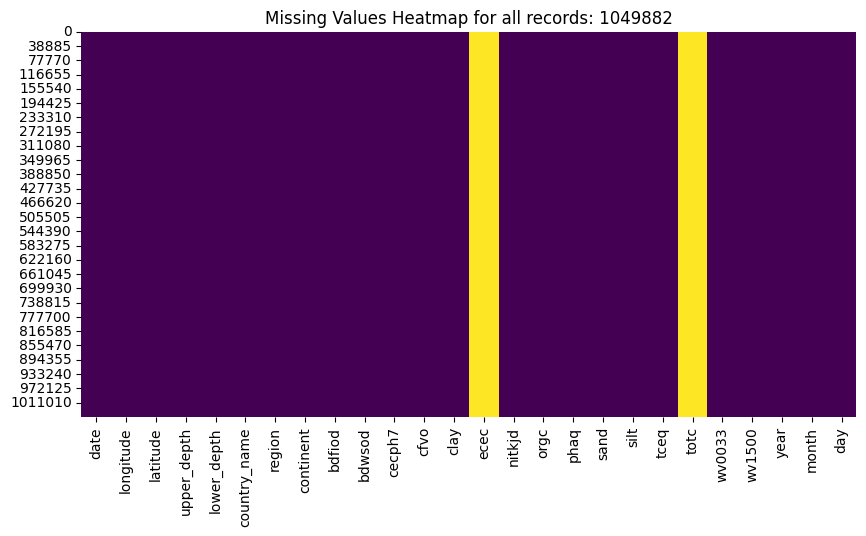

No records from year 2000 onwards


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot missing values heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title(f'Missing Values Heatmap for all records: {len(dataset)}')
plt.show()

# plot missing values heatmap
if dataset_from_2000.empty:
    print("No records from year 2000 onwards")
else:
    plt.figure(figsize=(10, 5))
    sns.heatmap(dataset_from_2000.isnull(), cbar=False, cmap='viridis')
    plt.title(f'Missing Values Heatmap for records from year 2000 onwards: {len(dataset_from_2000)}')
    plt.show()

In [67]:
# delete columns with missing values more than 80%
dataset = dataset.dropna(axis=1, thresh=len(dataset)*0.2)
print(f'Number of columns after deleting columns with more than 80% missing values: {dataset.columns}')

# drop values from feature_columns list
feature_columns = [col for col in feature_columns if col in dataset.columns]
print(f'Feature columns after deleting columns with more than 80% missing values: {feature_columns}')

Number of columns after deleting columns with more than 80% missing values: Index(['date', 'longitude', 'latitude', 'upper_depth', 'lower_depth',
       'country_name', 'region', 'continent', 'bdfiod', 'bdwsod', 'cecph7',
       'cfvo', 'clay', 'nitkjd', 'orgc', 'phaq', 'sand', 'silt', 'tceq',
       'wv0033', 'wv1500', 'year', 'month', 'day'],
      dtype='object')
Feature columns after deleting columns with more than 80% missing values: ['upper_depth', 'lower_depth', 'bdfiod', 'bdwsod', 'cecph7', 'cfvo', 'clay', 'nitkjd', 'orgc', 'phaq', 'sand', 'silt', 'tceq', 'wv0033', 'wv1500']


In [68]:
dataset.head()

,date,longitude,latitude,upper_depth,lower_depth,country_name,region,continent,bdfiod,bdwsod,...,orgc,phaq,sand,silt,tceq,wv0033,wv1500,year,month,day
0,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,21.6,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
1,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,77.8,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
2,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,22.1,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
3,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,25.4,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1
4,1918-01-01,-89.0,15.5,0.0,15.0,Guatemala,Central America,Northern America,0.8,NaN,...,21.6,NaN,NaN,NaN,NaN,NaN,NaN,1918,1,1


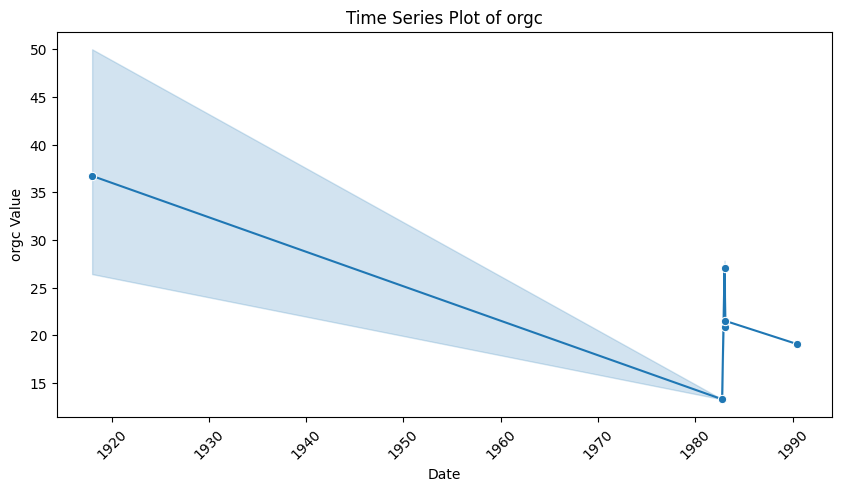

In [69]:
# timeseries plot of orgc
plt.figure(figsize=(10, 5))
sns.lineplot(data=dataset, x='date', y='orgc', marker='o', linestyle='-')
plt.title('Time Series Plot of orgc')
plt.xlabel('Date')
plt.ylabel('orgc Value')
plt.xticks(rotation=45)
plt.show()

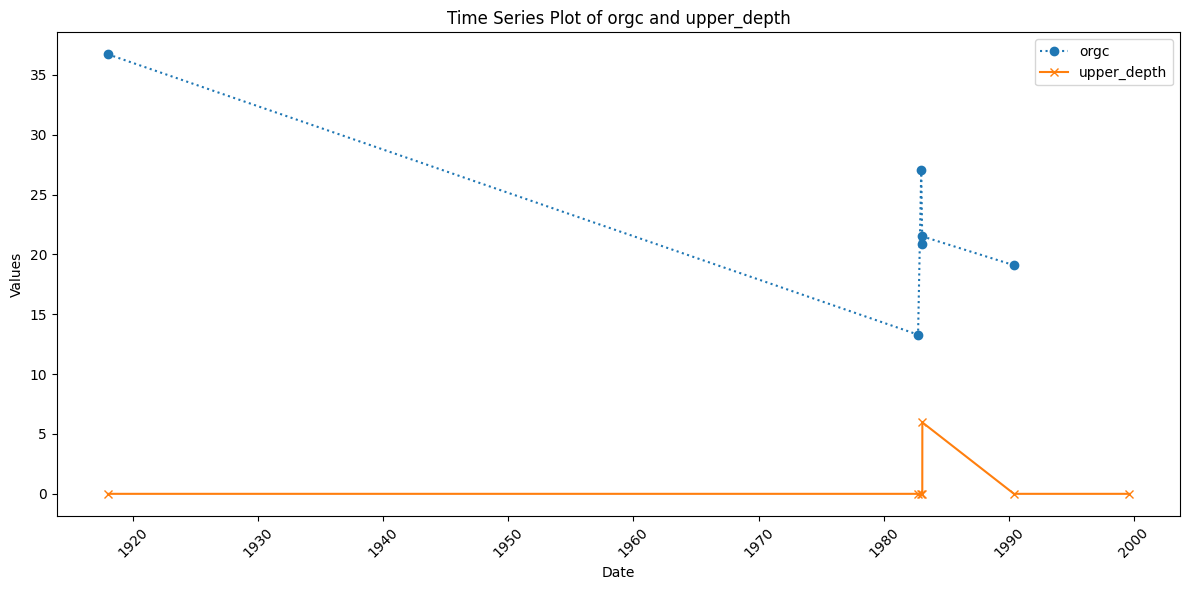

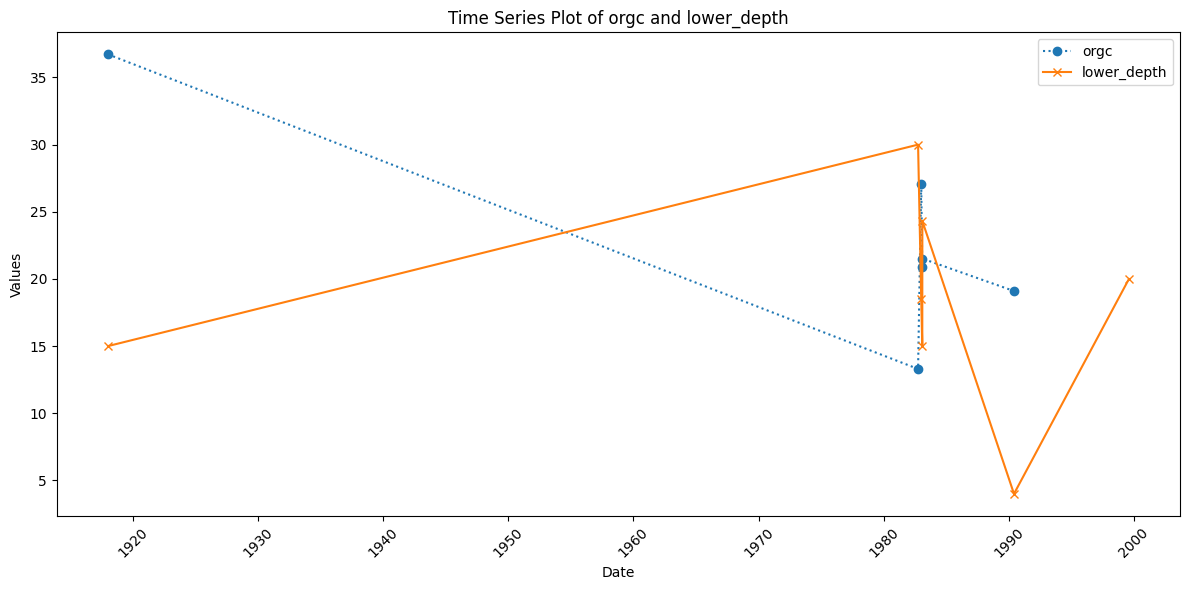

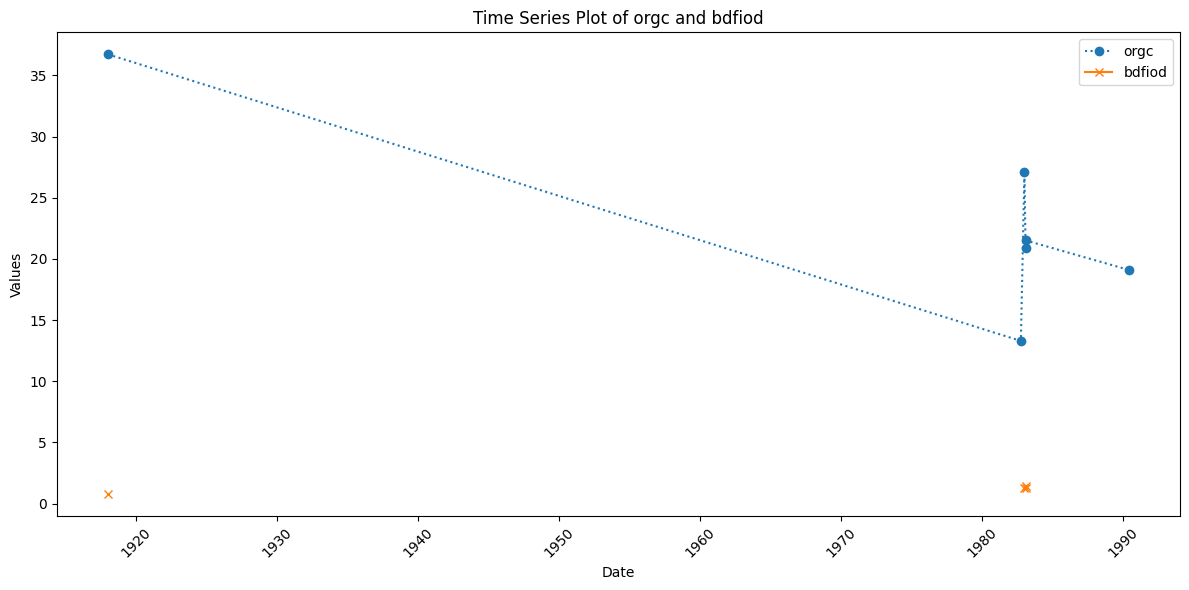

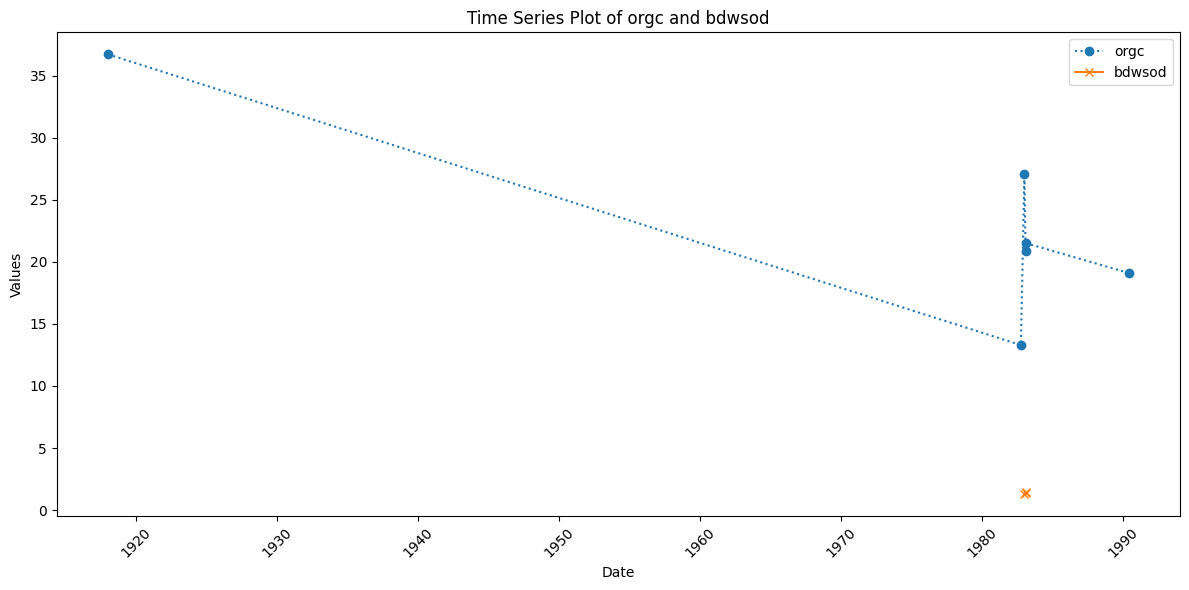

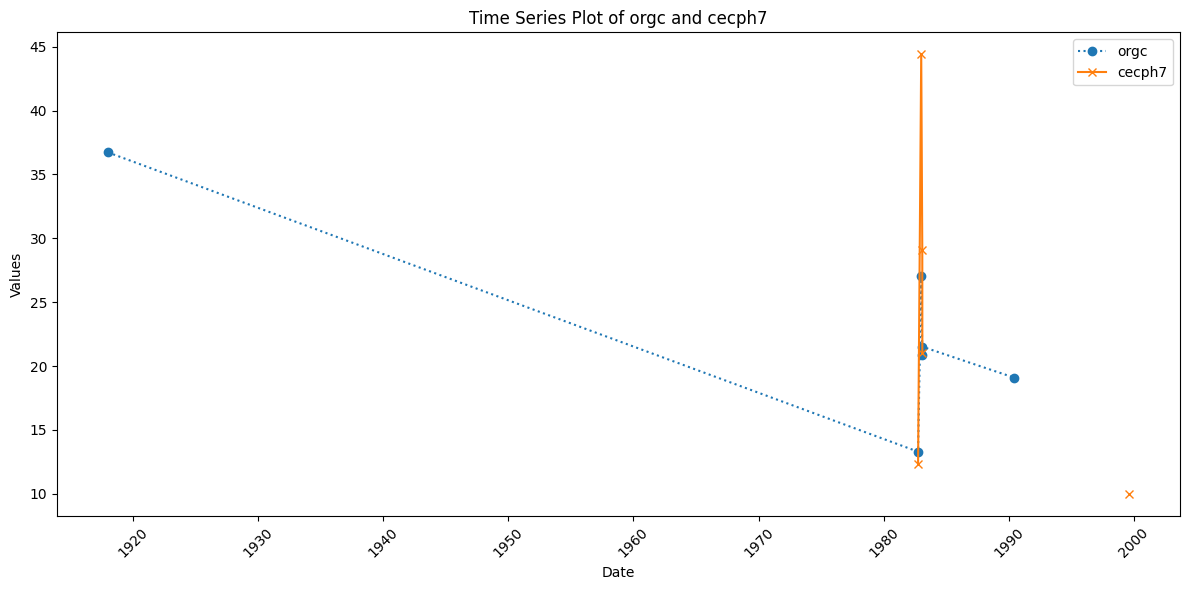

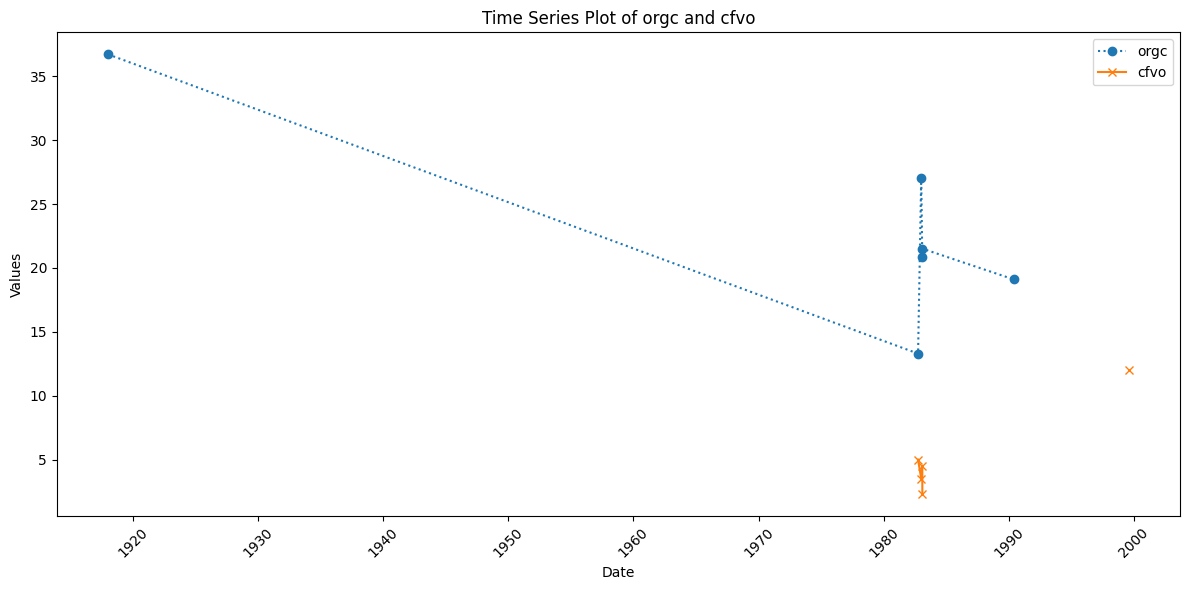

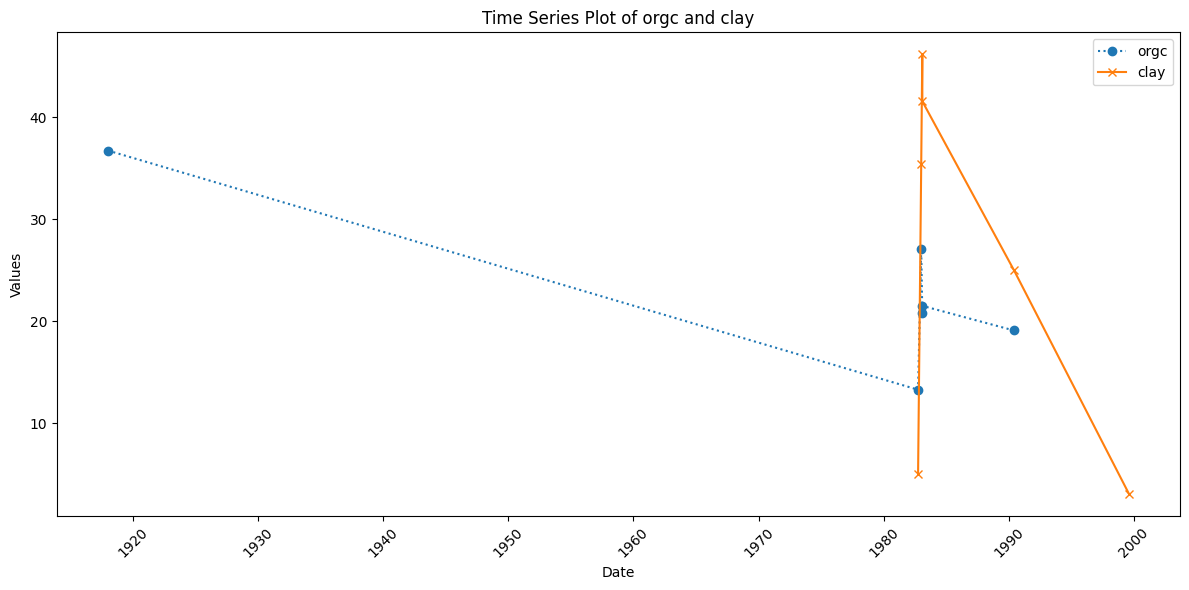

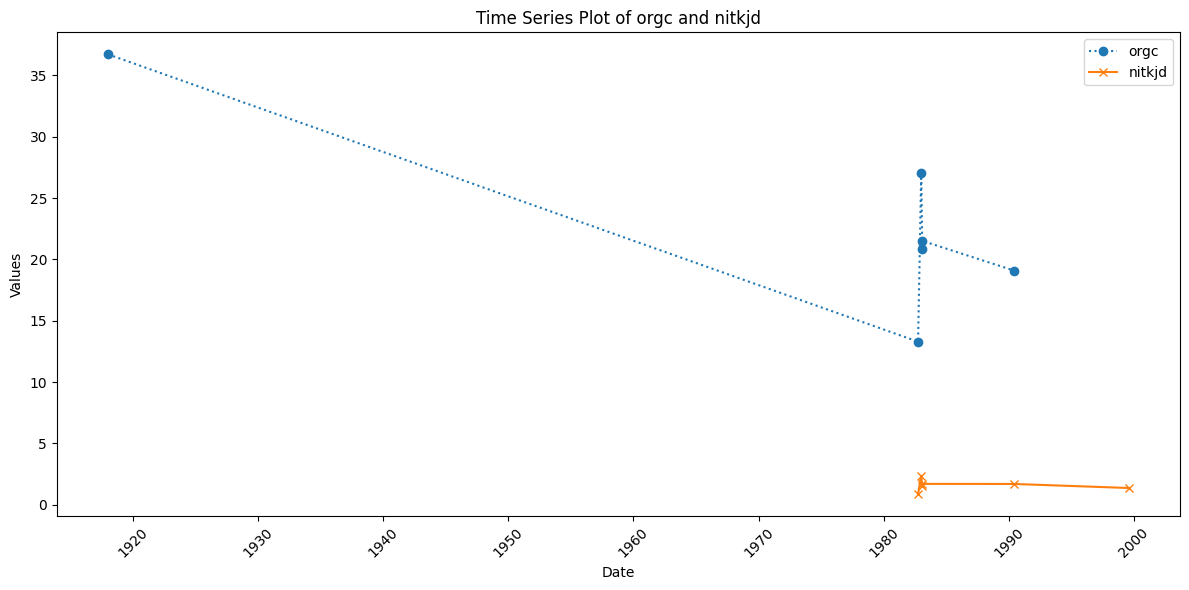

<Figure size 1200x600 with 0 Axes>

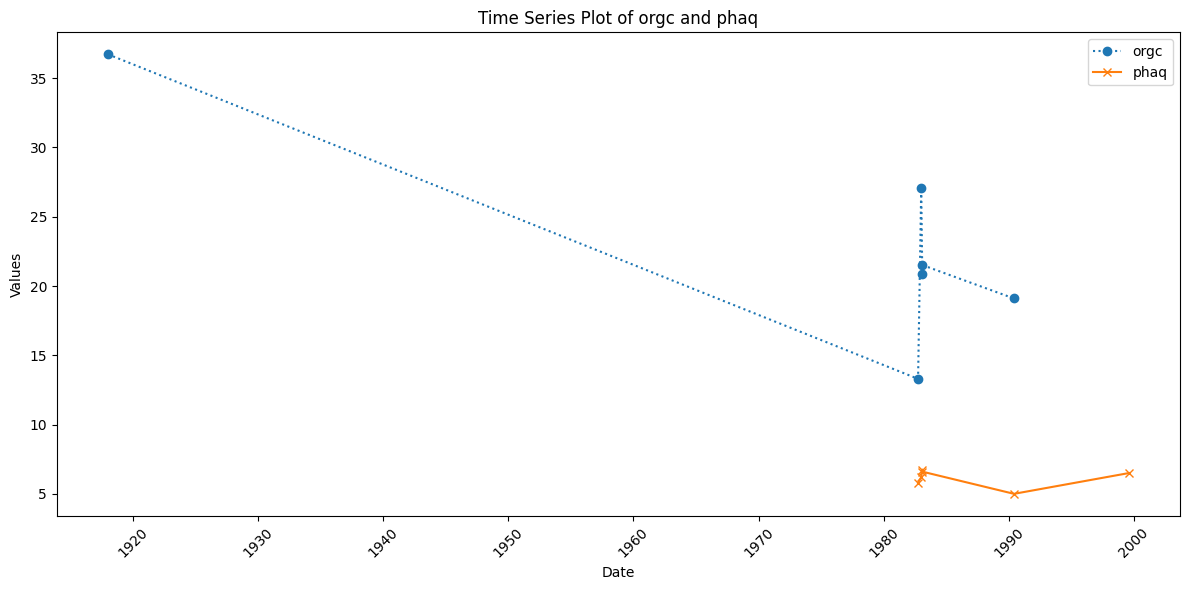

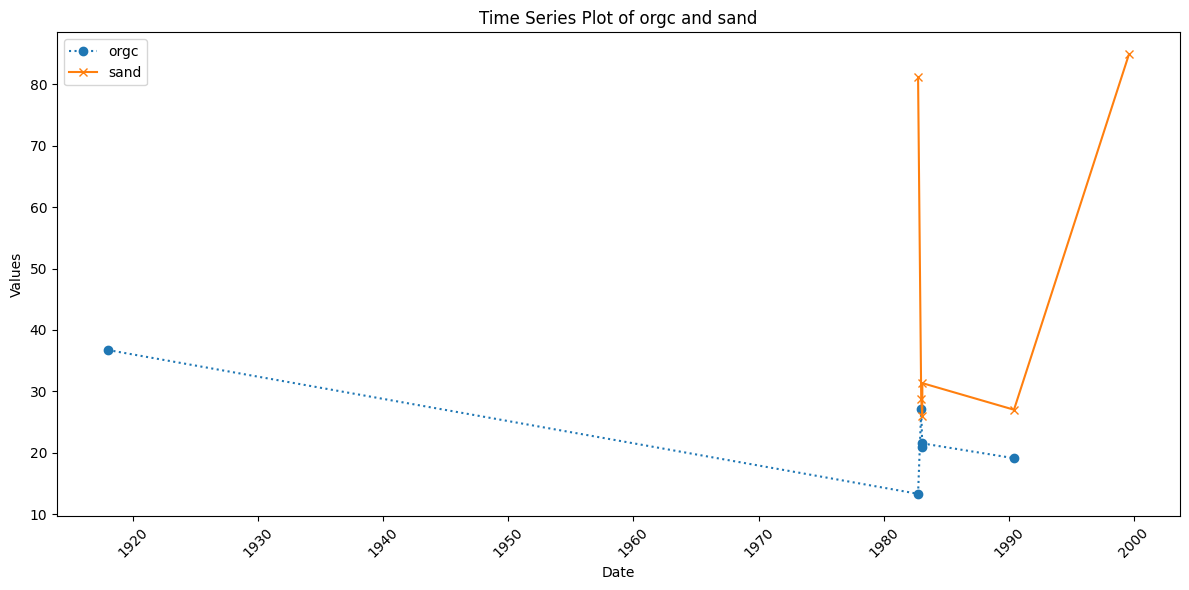

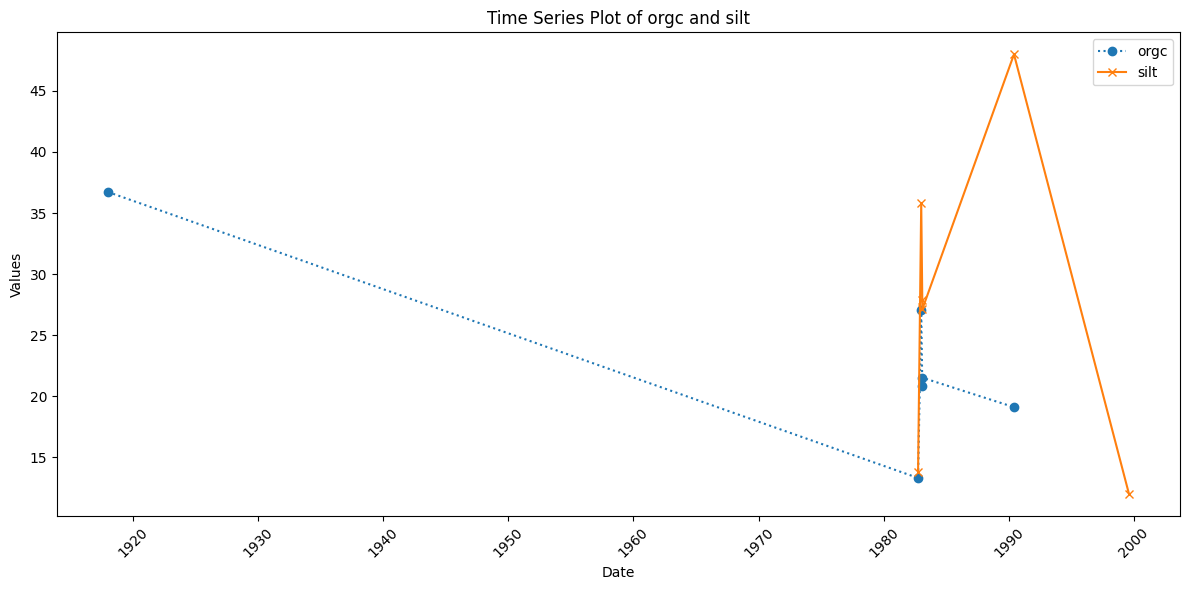

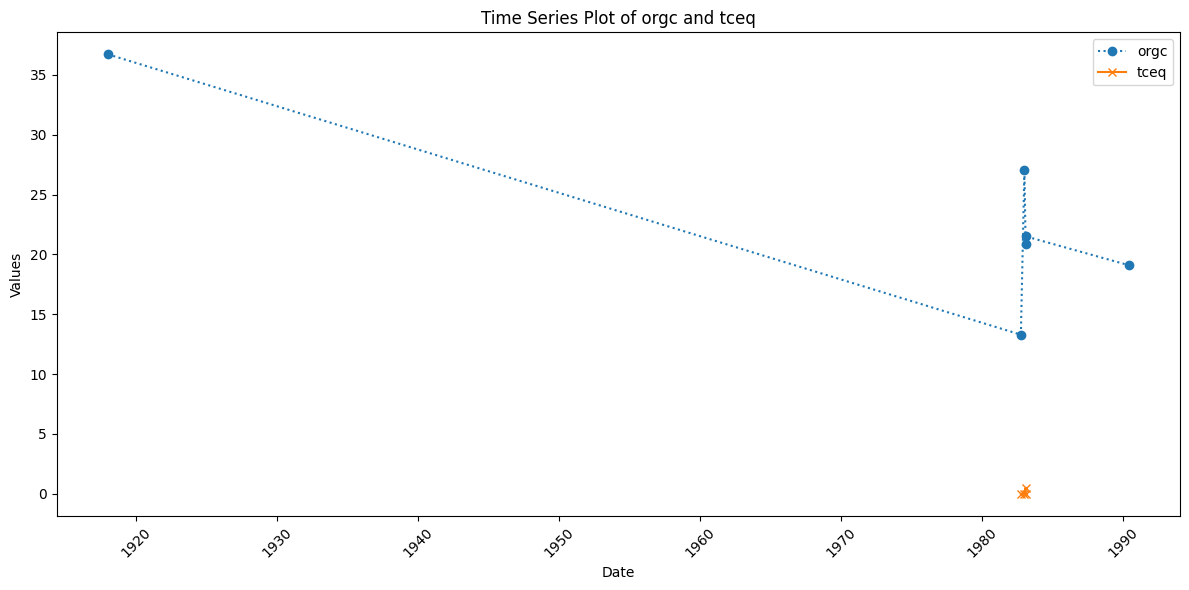

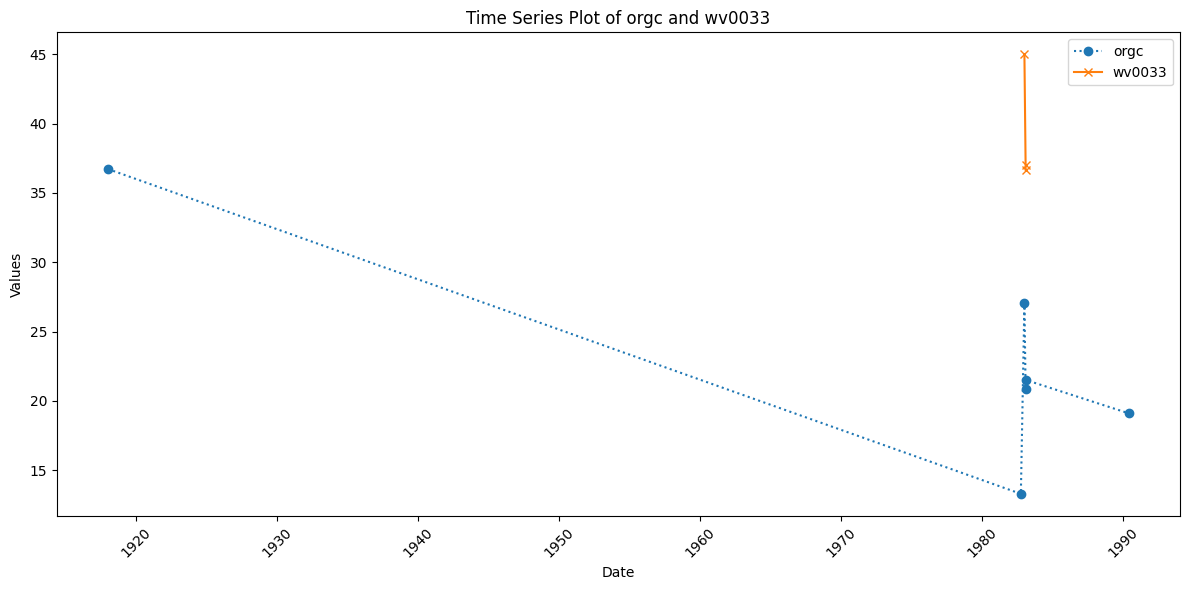

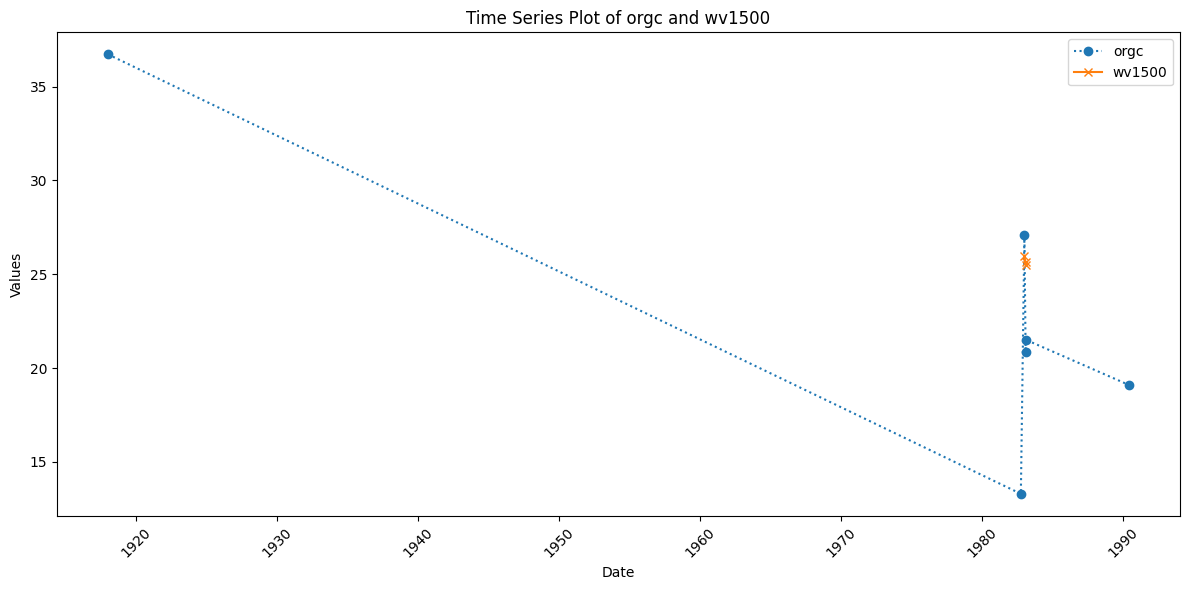

In [70]:
# compare with all features
for feature in feature_columns:
    plt.figure(figsize=(12, 6))
    if feature == 'orgc':
        continue

    orgc_data = dataset.groupby('date').agg({'orgc': 'mean'}).reset_index()
    plt.plot(orgc_data['date'], orgc_data['orgc'], marker='o', linestyle=':', label='orgc')

    feature_data = dataset.groupby('date').agg({feature: 'mean'}).reset_index()
    plt.plot(feature_data['date'], feature_data[feature], marker='x', linestyle='-', label=feature)

    plt.title(f'Time Series Plot of orgc and {feature}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ESDA

## Check frequency of upper_depth and lower_depth

In [71]:
# Group by year, upper_depth, and lower_depth and count occurrences
frequency_counts = dataset.groupby(['year', 'upper_depth', 'lower_depth']).size().reset_index(name='count')

# Count the number of records for each year
yearly_record_counts = dataset.groupby('year').size().reset_index(name='total_records')

# Display the frequency counts
print(frequency_counts.head())

# print unique count of upper_depth and lower_depth
print(f'Unique upper_depth: {dataset["upper_depth"].unique()}')
print(f'Unique lower_depth: {dataset["lower_depth"].unique()}')

# check count > 1
print(f'Number of records with count greater than 1: {len(frequency_counts[frequency_counts["count"] > 1])}')

# create a new dataset with count > 1
frequency_counts_gt_1 = frequency_counts[frequency_counts["count"] > 1]

   year  upper_depth  lower_depth    count
0  1918          0.0         15.0       16
1  1982          0.0         30.0      129
2  1983          0.0         11.0      128
3  1983          0.0         12.0      129
4  1983          0.0         15.0  1048576
Unique upper_depth: [ 0. 18.]
Unique lower_depth: [15. 30. 11. 20. 27. 21. 19. 18. 28. 12. 25.  4.]
Number of records with count greater than 1: 11


## Visualise the frequency of upper_depth and lower_depth by year

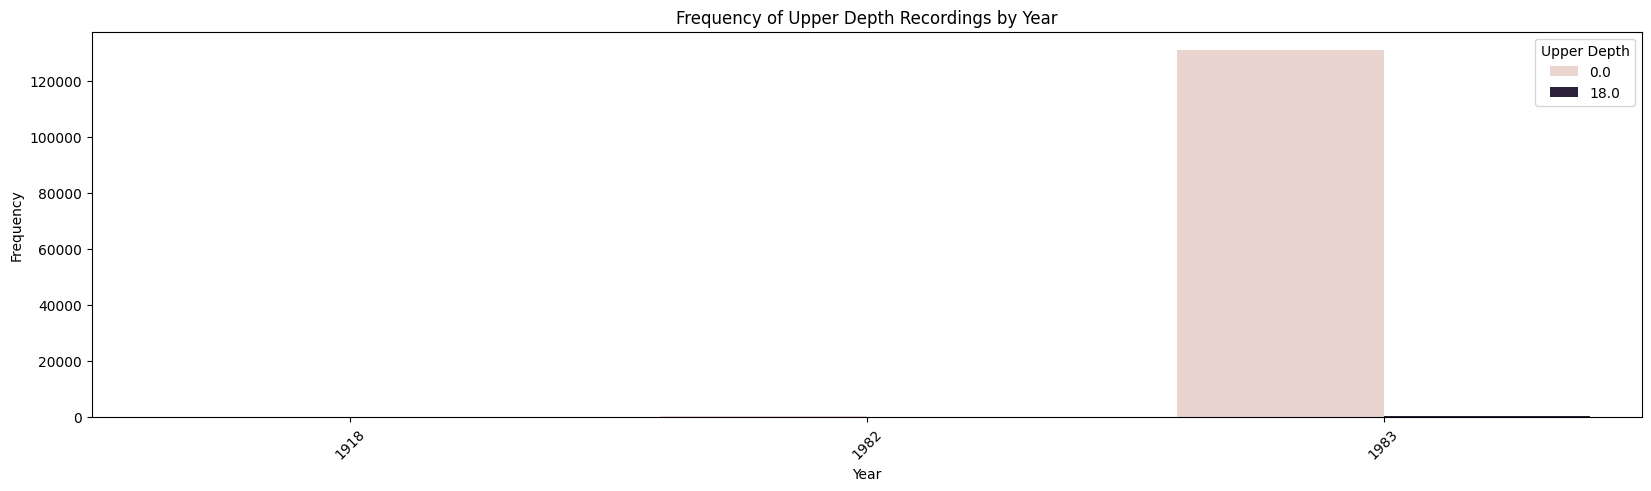

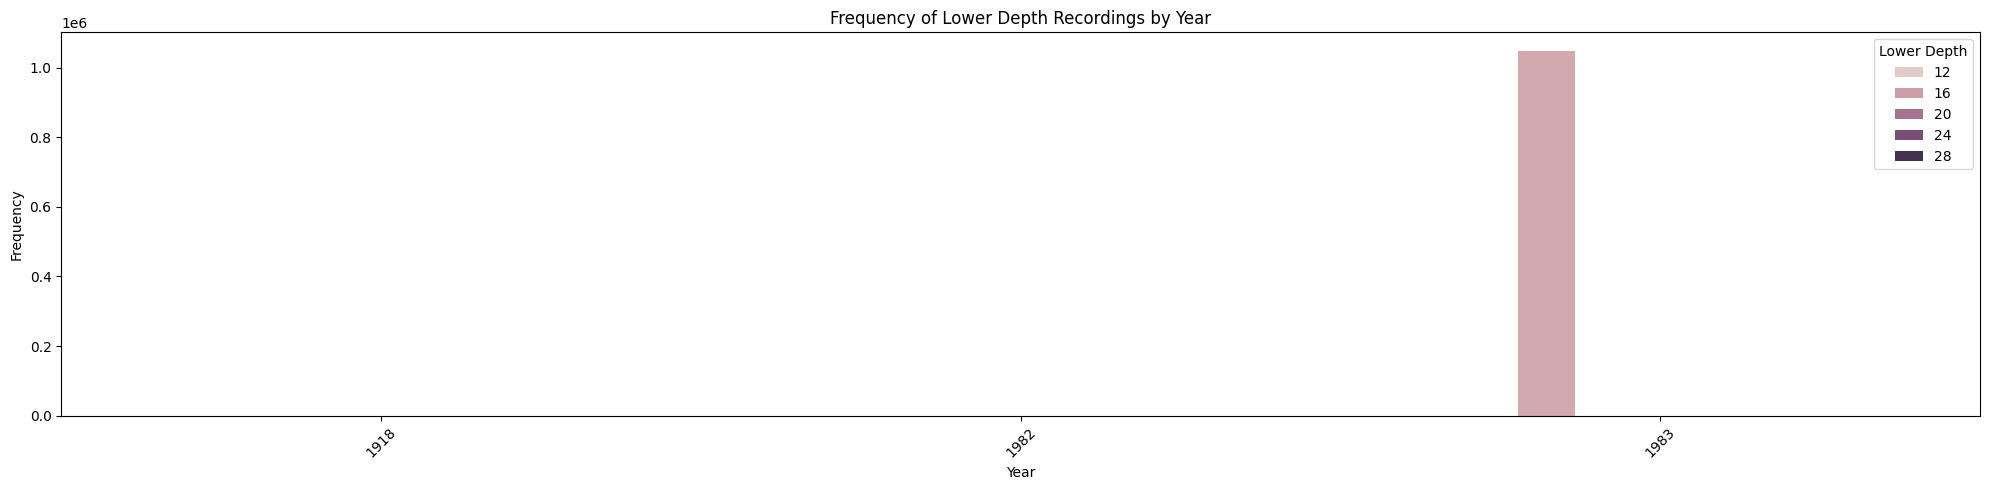

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(20, 5))
sns.barplot(data=frequency_counts_gt_1, x='year', y='count', hue='upper_depth', errorbar=None)
# Set titles and labels
plt.title('Frequency of Upper Depth Recordings by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Upper Depth')
plt.xticks(rotation=45)

# Create a bar plot
plt.figure(figsize=(20, 5))
sns.barplot(data=frequency_counts_gt_1, x='year', y='count', hue='lower_depth', errorbar=None)
# Set titles and labels
plt.title('Frequency of Lower Depth Recordings by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Lower Depth')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Yearly record counts

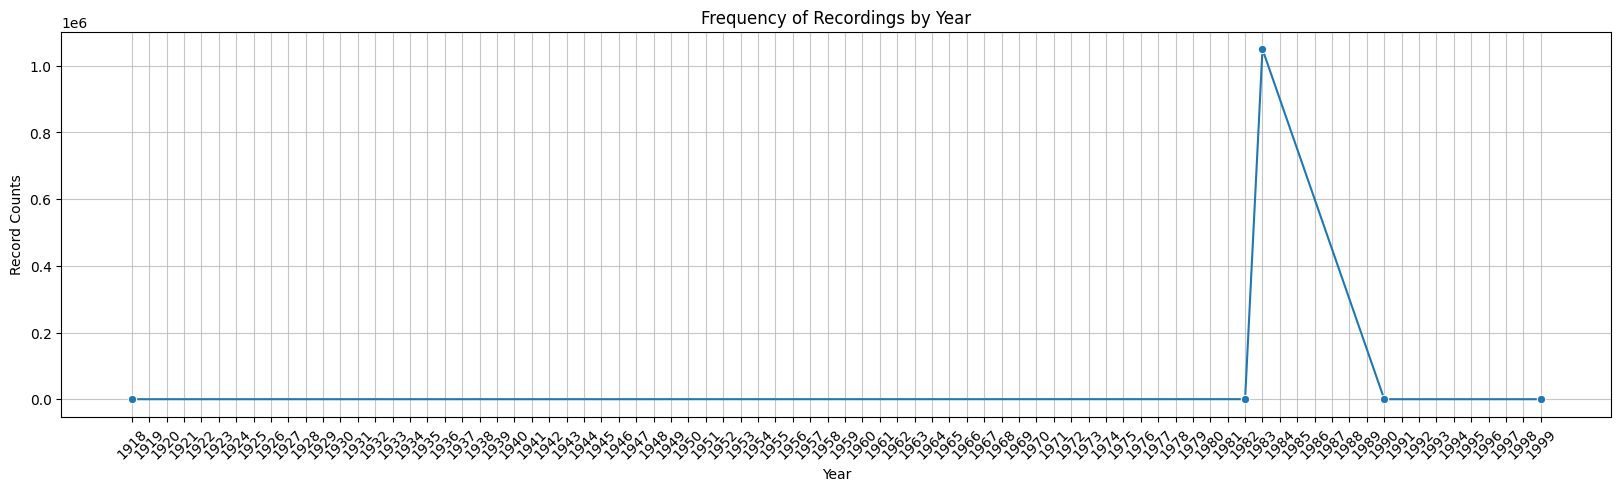

In [73]:
# line plot of yearly record counts
plt.figure(figsize=(20, 5))
sns.lineplot(data=yearly_record_counts, x='year', y='total_records', marker='o')
plt.title('Frequency of Recordings by Year')
plt.xlabel('Year')
plt.ylabel('Record Counts')
plt.xticks(range(min(yearly_record_counts['year']), max(yearly_record_counts['year'])+1, 1), rotation=45)
plt.grid(True, linestyle='-', alpha=0.7)
plt.show()

## Exploratory analysis for specific year



Number of records: 0
Number of records with count greater than 1: 0


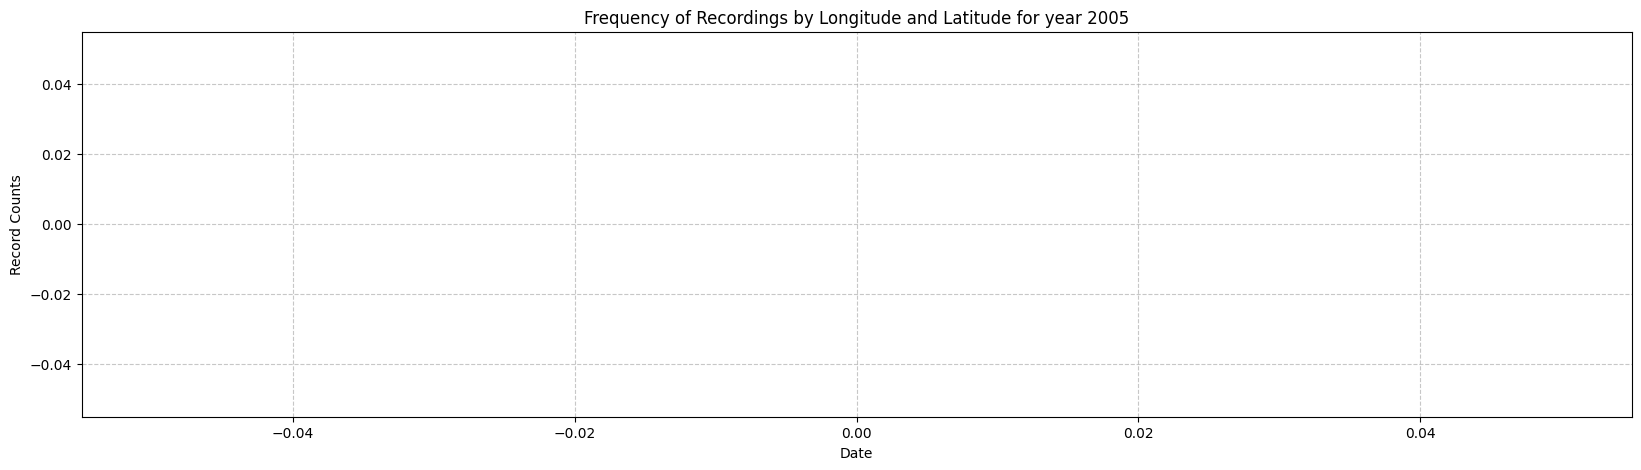

In [74]:
# Specify the year you want to analyze
specific_year = 2005

# Filter the DataFrame for the specific year
dataset['year'] = dataset['date'].dt.year
filtered_df = dataset[dataset['year'] == specific_year]

# Group by latitude, longitude, upper depth, and lower depth and count occurrences
frequency_counts = filtered_df.groupby(['latitude', 'longitude', 'date']).size().reset_index(name='count')

# Display the frequency counts
print(f'Number of records: {len(frequency_counts)}')

# print number of records with count greater than 1
print(f'Number of records with count greater than 1: {len(frequency_counts[frequency_counts["count"] > 1])}')

# line plot of yearly record counts
plt.figure(figsize=(20, 5))
sns.lineplot(data=frequency_counts, x='date', y='count', marker='o')
plt.title(f'Frequency of Recordings by Longitude and Latitude for year {specific_year}')
plt.xlabel('Date')
plt.ylabel('Record Counts')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

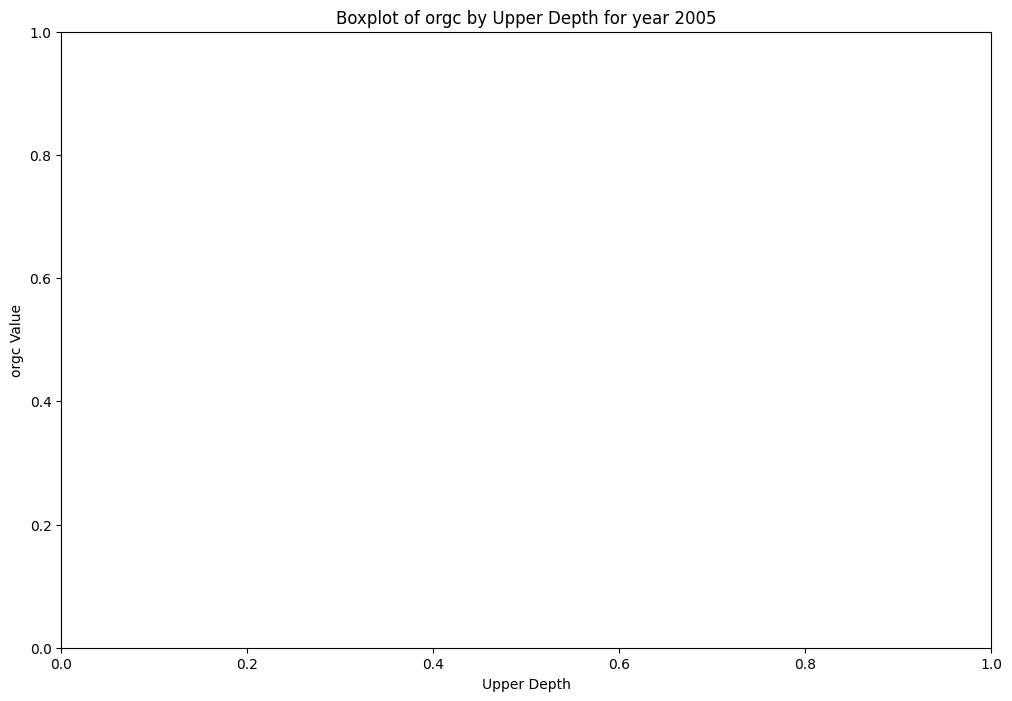

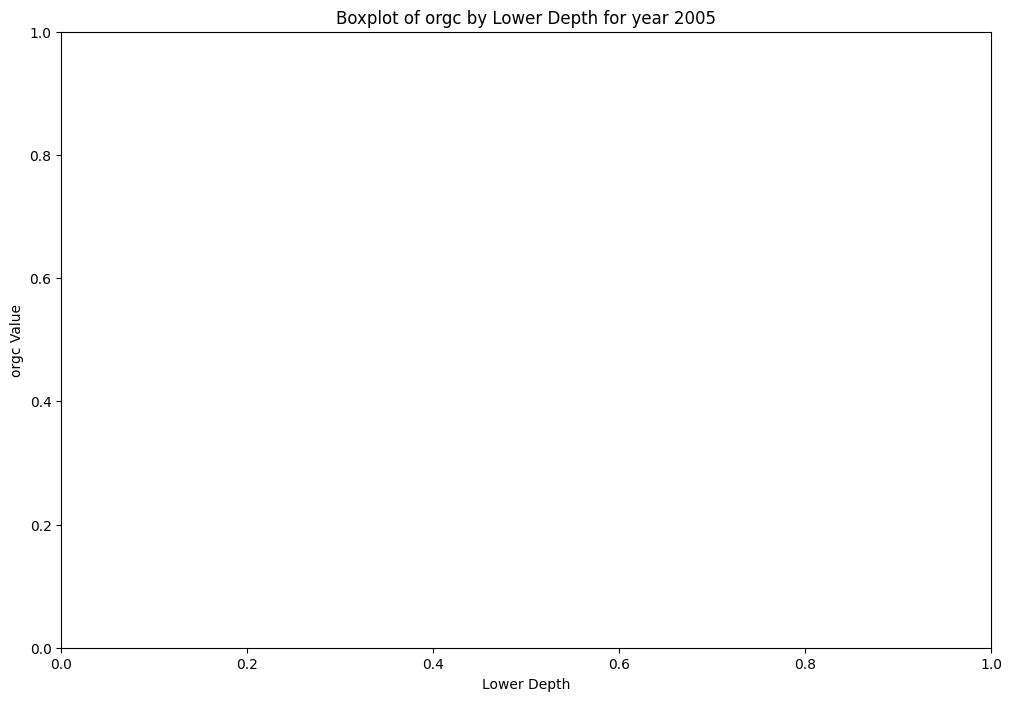

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for orgc based on upper_depth
plt.figure(figsize=(12, 8))
sns.boxplot(x='upper_depth', y='orgc', data=dataset[dataset['year'] == specific_year])
plt.title(f'Boxplot of orgc by Upper Depth for year {specific_year}')  
plt.xlabel('Upper Depth')
plt.ylabel('orgc Value')
plt.show()

# Boxplot for orgc based on lower_depth
plt.figure(figsize=(12, 8))
sns.boxplot(x='lower_depth', y='orgc', data=dataset[dataset['year'] == specific_year])
plt.title(f'Boxplot of orgc by Lower Depth for year {specific_year}')
plt.xlabel('Lower Depth')
plt.ylabel('orgc Value')
plt.show()

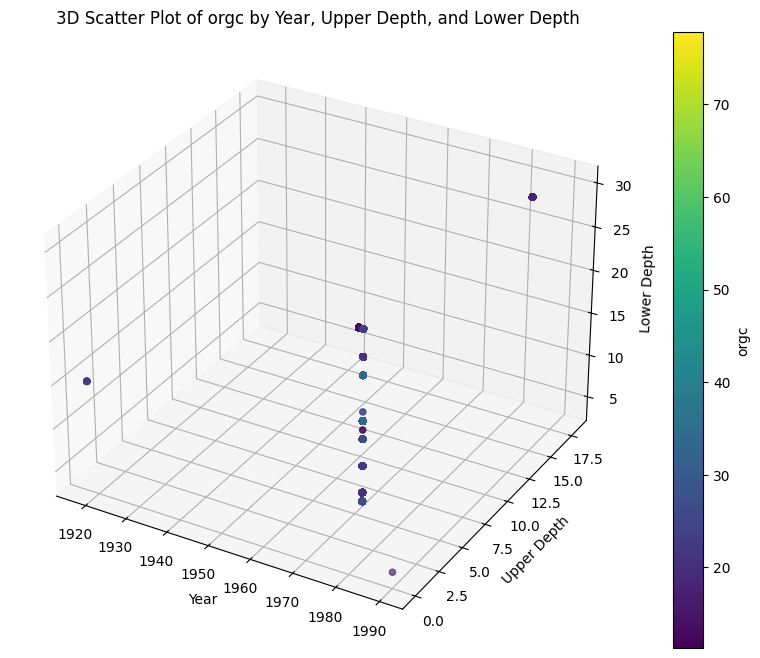

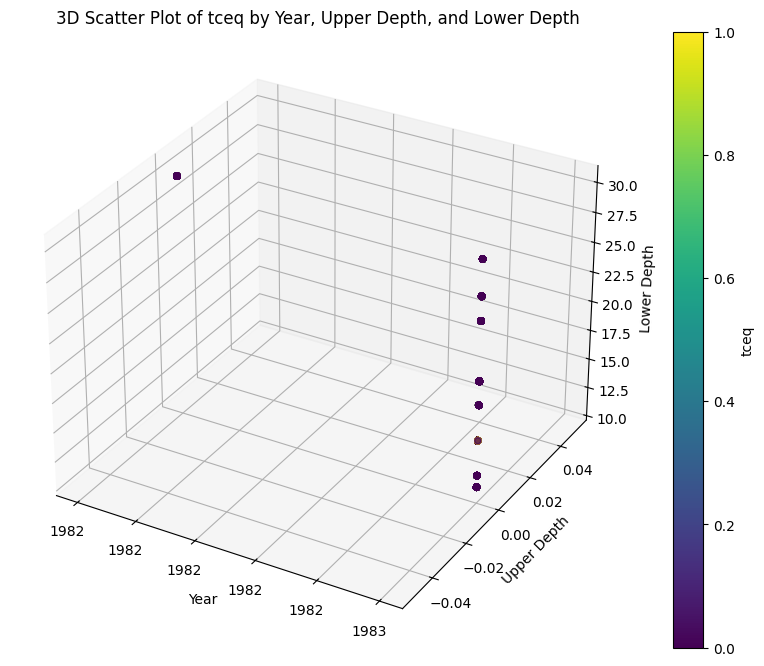

In [76]:
plot_columns = ['orgc', 'tceq']

for i, col in enumerate(plot_columns):
    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(dataset['year'], dataset['upper_depth'], dataset['lower_depth'],
                        c=dataset[col], cmap='viridis', marker='o')

    # Set labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Upper Depth')
    ax.set_zlabel('Lower Depth')
    ax.set_title(f'3D Scatter Plot of {col} by Year, Upper Depth, and Lower Depth')

    # Format x-axis to show years as integers
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    plt.colorbar(scatter, label=col)
    plt.show()